In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Least-Squares Linear Regression

- fit slope and intercept so that the linear regression fit (here: "line") minimizes the sum of the residuals (vertical offsets or distances)

<img src="images/linear_regression_scheme.png" width="450" />

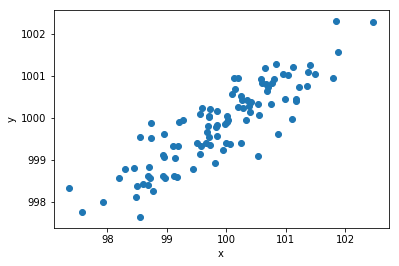

In [2]:
rng = np.random.RandomState(123)
mean = [100, 1000]
cov = [[1, 0.9], [0.9, 1]]
sample = rng.multivariate_normal(mean, cov, size=100)
x, y = sample[:, 0], sample[:, 1]

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 1. Least-squares linear regression via "classic statistic"

- using "classic statistics":

$$w_1 = \frac{\sigma_{x,y}}{\sigma_{x}^{2}}\quad$$

$$b = \bar{y} - w_1\bar{x}\quad$$

where 


$$\text{covariance: } \sigma_{xy} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$$

$$\text{variance: } \sigma^{2}_{x} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2\quad$$

In [5]:
cov_xy = np.cov(np.vstack((x, y)), ddof=0)[0, 1]
var_x = np.var(x, ddof=0)
w1 = cov_xy / var_x
b = np.mean(y) - w1*np.mean(x)

print('slope: %.2f' % w1)
print('y-intercept: %.2f' % b)

slope: 0.84
y-intercept: 915.59


### 2. Least-squares linear regression via linear algebra

- closed-form (analytical) solution:

$$w = (X^T X)^{-1} X^T y$$

In [ ]:
X = x[:, np.newaxis]

# adding a column vector of "ones"
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])

z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))
b, w1 = w[0], w[1]
print('slope: %.2f' % w1)
print('y-intercept: %.2f' % b)

### 3. Using a pre-implemented function

In [ ]:
w = np.polyfit(x, y, deg=1)
b, w1 = w[1], w[0]
print('slope: %.2f' % w1)
print('y-intercept: %.2f' % b)

- note that there are many alternative tools (scikit-learn, statsmodels, ...)

### Show line fit

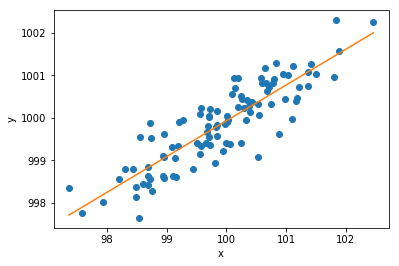

In [7]:
extremes = np.array([np.min(x), np.max(x)])
predict = extremes*w1 + b

plt.plot(x, y, marker='o', linestyle='')
plt.plot(extremes, predict)
plt.xlabel('x')
plt.ylabel('y')
plt.show()